In [1]:
import MyClassify.ClassifyModel as mcmodel
import MyClassify.DataHandler as dh
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

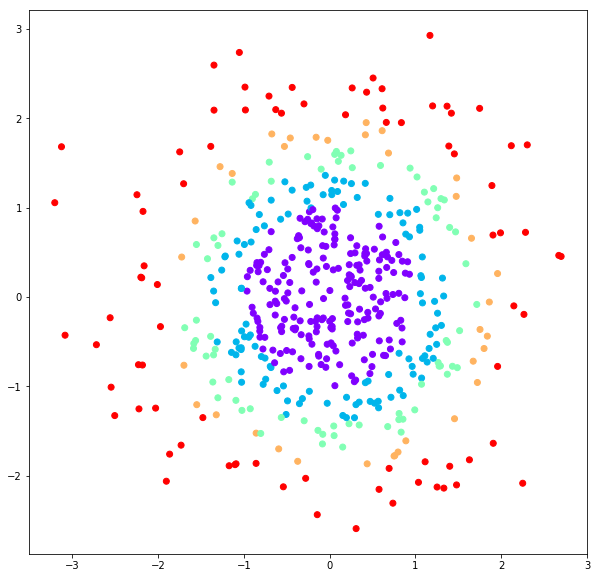

In [2]:
dataGen =  dh.DataHandler(2019,512,5,64)
x,y = zip(*dataGen.datas)
plt.figure(figsize=(10,10))
plt.scatter(x,y,c=dataGen.labels,cmap='rainbow')
plt.show()

In [6]:
regularFactors = [0,-0.01,-0.001,-0.0001,0.01,0.001,0.0001]
for regularFactor in regularFactors:
    print("<====================Train. regularFactor = ",regularFactor,"==============================>")
    tf.reset_default_graph()    
    model = mcmodel.ClassifyModel(5,regularFactor)
    train_op,logits,loss,accuracy,learningRate = model.models(1000,0.99)
    batch_size_func = dataGen.get_batch()
    saver = tf.train.Saver(max_to_keep=1)
    with tf.Session() as sess:
        tf.global_variables_initializer().run()
        c_step = 0
        total_step = 15000
        while(c_step<total_step):
            batch_x,batch_label = batch_size_func.__next__()
            sess.run([train_op],feed_dict={"inputs:0":batch_x,"labels:0":batch_label,"dropout:0":1})
            if c_step%1000==0:
                ls,acc,lr = sess.run([loss,accuracy,learningRate],feed_dict={"inputs:0":batch_x,"labels:0":batch_label,"dropout:0":1})
                print("[{}/{}] loss = {},learningRate = {},accuracy = {:.2%}".format(c_step,total_step,ls,lr,acc))
            c_step += 1
        saver.save(sess,'ckpt/class_%.5f.ckpt'%(regularFactor),global_step=c_step)
        print("save checkpoint.")

<====================Train. regularFactor =  0 ==============================>
[0/15000] loss = 8.765288352966309,learningRate = 0.0010000000474974513,accuracy = 14.06%
[1000/15000] loss = 0.5980849266052246,learningRate = 0.0009899999713525176,accuracy = 89.06%
[2000/15000] loss = 0.38143855333328247,learningRate = 0.000980100012384355,accuracy = 92.19%
[3000/15000] loss = 0.26256871223449707,learningRate = 0.0009702990646474063,accuracy = 95.31%
[4000/15000] loss = 0.1876966953277588,learningRate = 0.000960596080403775,accuracy = 95.31%
[5000/15000] loss = 0.13373617827892303,learningRate = 0.0009509901283308864,accuracy = 96.88%
[6000/15000] loss = 0.09955695271492004,learningRate = 0.0009414802771061659,accuracy = 96.88%
[7000/15000] loss = 0.07816003262996674,learningRate = 0.0009320654789917171,accuracy = 100.00%
[8000/15000] loss = 0.06420251727104187,learningRate = 0.0009227448026649654,accuracy = 100.00%
[9000/15000] loss = 0.05305996537208557,learningRate = 0.0009135173750109

[6000/15000] loss = 0.29547128081321716,learningRate = 0.0009414802771061659,accuracy = 98.44%
[7000/15000] loss = 0.2757967710494995,learningRate = 0.0009320654789917171,accuracy = 98.44%
[8000/15000] loss = 0.25989851355552673,learningRate = 0.0009227448026649654,accuracy = 98.44%
[9000/15000] loss = 0.246231347322464,learningRate = 0.0009135173750109971,accuracy = 100.00%
[10000/15000] loss = 0.2332659512758255,learningRate = 0.0009043822064995766,accuracy = 100.00%
[11000/15000] loss = 0.22344349324703217,learningRate = 0.0008953384822234511,accuracy = 100.00%
[12000/15000] loss = 0.21481934189796448,learningRate = 0.0008863849216140807,accuracy = 100.00%
[13000/15000] loss = 0.20700308680534363,learningRate = 0.0008775211172178388,accuracy = 100.00%
[14000/15000] loss = 0.19919522106647491,learningRate = 0.0008687459630891681,accuracy = 100.00%
save checkpoint.
<====================Train. regularFactor =  0.0001 ==============================>
[0/15000] loss = 8.31198787689209,lea